In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

sns.set_style('white')

# Primary biliary cirrhosis (PBC)

 This data is from the Mayo Clinic trial in primary biliary cirrhosis (PBC) of the liver conducted between 1974 and 1984. A total of 424 PBC patients, referred to Mayo Clinic during that tenyear interval, met eligibility criteria for the randomized placebo controlled trial of the drug Dpenicillamine. 
 
The first 312 cases in the data set participated in the randomized trial and contain largely complete data. 

The additional 112 cases did not participate in the clinical trial, but consented to have basic measurements recorded and to be followed for survival. 

Six of those cases were lost to follow-up shortly after diagnosis, so the data here are on an additional 106 cases as well as the 312 randomized participants.

A nearly identical data set found in appendix D of Fleming and Harrington; this version has fewer missing values.

In [2]:
pbc = pd.read_csv('../../../data/pbc.csv')

In [3]:
pbc = pbc.assign(output=pbc.status.replace([0,1,2],["Live","Dead","Dead"]))

In [4]:
pbc.status = pbc.status.astype('category')
pbc.output = pbc.output.astype('category')
pbc.trt = pbc.trt.astype('category')

In [5]:
pbc.output.value_counts()

Live    232
Dead    186
Name: output, dtype: int64

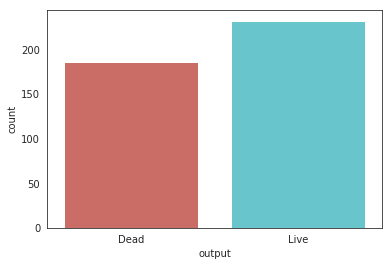

In [68]:
sns.countplot(x='output',data=pbc, palette='hls')
plt.show()

In [6]:
pbc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 21 columns):
id          418 non-null int64
time        418 non-null int64
status      418 non-null category
trt         312 non-null category
age         418 non-null float64
sex         418 non-null object
ascites     312 non-null float64
hepato      312 non-null float64
spiders     312 non-null float64
edema       418 non-null float64
bili        418 non-null float64
chol        284 non-null float64
albumin     418 non-null float64
copper      310 non-null float64
alk.phos    312 non-null float64
ast         312 non-null float64
trig        282 non-null float64
platelet    407 non-null float64
protime     416 non-null float64
stage       412 non-null float64
output      418 non-null category
dtypes: category(3), float64(15), int64(2), object(1)
memory usage: 60.4+ KB


In [69]:
pbc.isnull().sum()

id            0
time          0
status        0
trt         106
age           0
sex           0
ascites     106
hepato      106
spiders     106
edema         0
bili          0
chol        134
albumin       0
copper      108
alk.phos    106
ast         106
trig        136
platelet     11
protime       2
stage         6
output        0
dtype: int64

In [7]:
pbc.describe()

,id,time,age,ascites,hepato,spiders,edema,bili,chol,albumin,copper,alk.phos,ast,trig,platelet,protime,stage
count,418.000000,418.000000,418.000000,312.000000,312.000000,312.000000,418.000000,418.000000,284.000000,418.000000,310.000000,312.000000,312.000000,282.000000,407.000000,416.000000,412.000000
mean,209.500000,1917.782297,50.741551,0.076923,0.512821,0.288462,0.100478,3.220813,369.510563,3.497440,97.648387,1982.655769,122.556346,124.702128,257.024570,10.731731,3.024272
std,120.810458,1104.672992,10.447214,0.266897,0.500639,0.453775,0.253417,4.407506,231.944545,0.424972,85.613920,2140.388824,56.699525,65.148639,98.325585,1.022000,0.882042
min,1.000000,41.000000,26.277892,0.000000,0.000000,0.000000,0.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,105.250000,1092.750000,42.832307,0.000000,0.000000,0.000000,0.000000,0.800000,249.500000,3.242500,41.250000,871.500000,80.600000,84.250000,188.500000,10.000000,2.000000
50%,209.500000,1730.000000,51.000684,0.000000,1.000000,0.000000,0.000000,1.400000,309.500000,3.530000,73.000000,1259.000000,114.700000,108.000000,251.000000,10.600000,3.000000
75%,313.750000,2613.500000,58.240931,0.000000,1.000000,1.000000,0.000000,3.400000,400.000000,3.770000,123.000000,1980.000000,151.900000,151.000000,318.000000,11.100000,4.000000
max,418.000000,4795.000000,78.439425,1.000000,1.000000,1.000000,1.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,4.000000


In [8]:
pbc_subset = pbc.dropna()

In [9]:
pbc_subset.count()

id          276
time        276
status      276
trt         276
age         276
sex         276
ascites     276
hepato      276
spiders     276
edema       276
bili        276
chol        276
albumin     276
copper      276
alk.phos    276
ast         276
trig        276
platelet    276
protime     276
stage       276
output      276
dtype: int64

In [10]:
pbc_subset.output.value_counts()

Live    147
Dead    129
Name: output, dtype: int64

In [ ]:
ax = train_df["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
train_df["Age"].plot(kind='density', color='teal')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

In [ ]:
train_data = train_df.copy()
train_data["Age"].fillna(train_df["Age"].median(skipna=True), inplace=True)
train_data["Embarked"].fillna(train_df['Embarked'].value_counts().idxmax(), inplace=True)
train_data.drop('Cabin', axis=1, inplace=True)

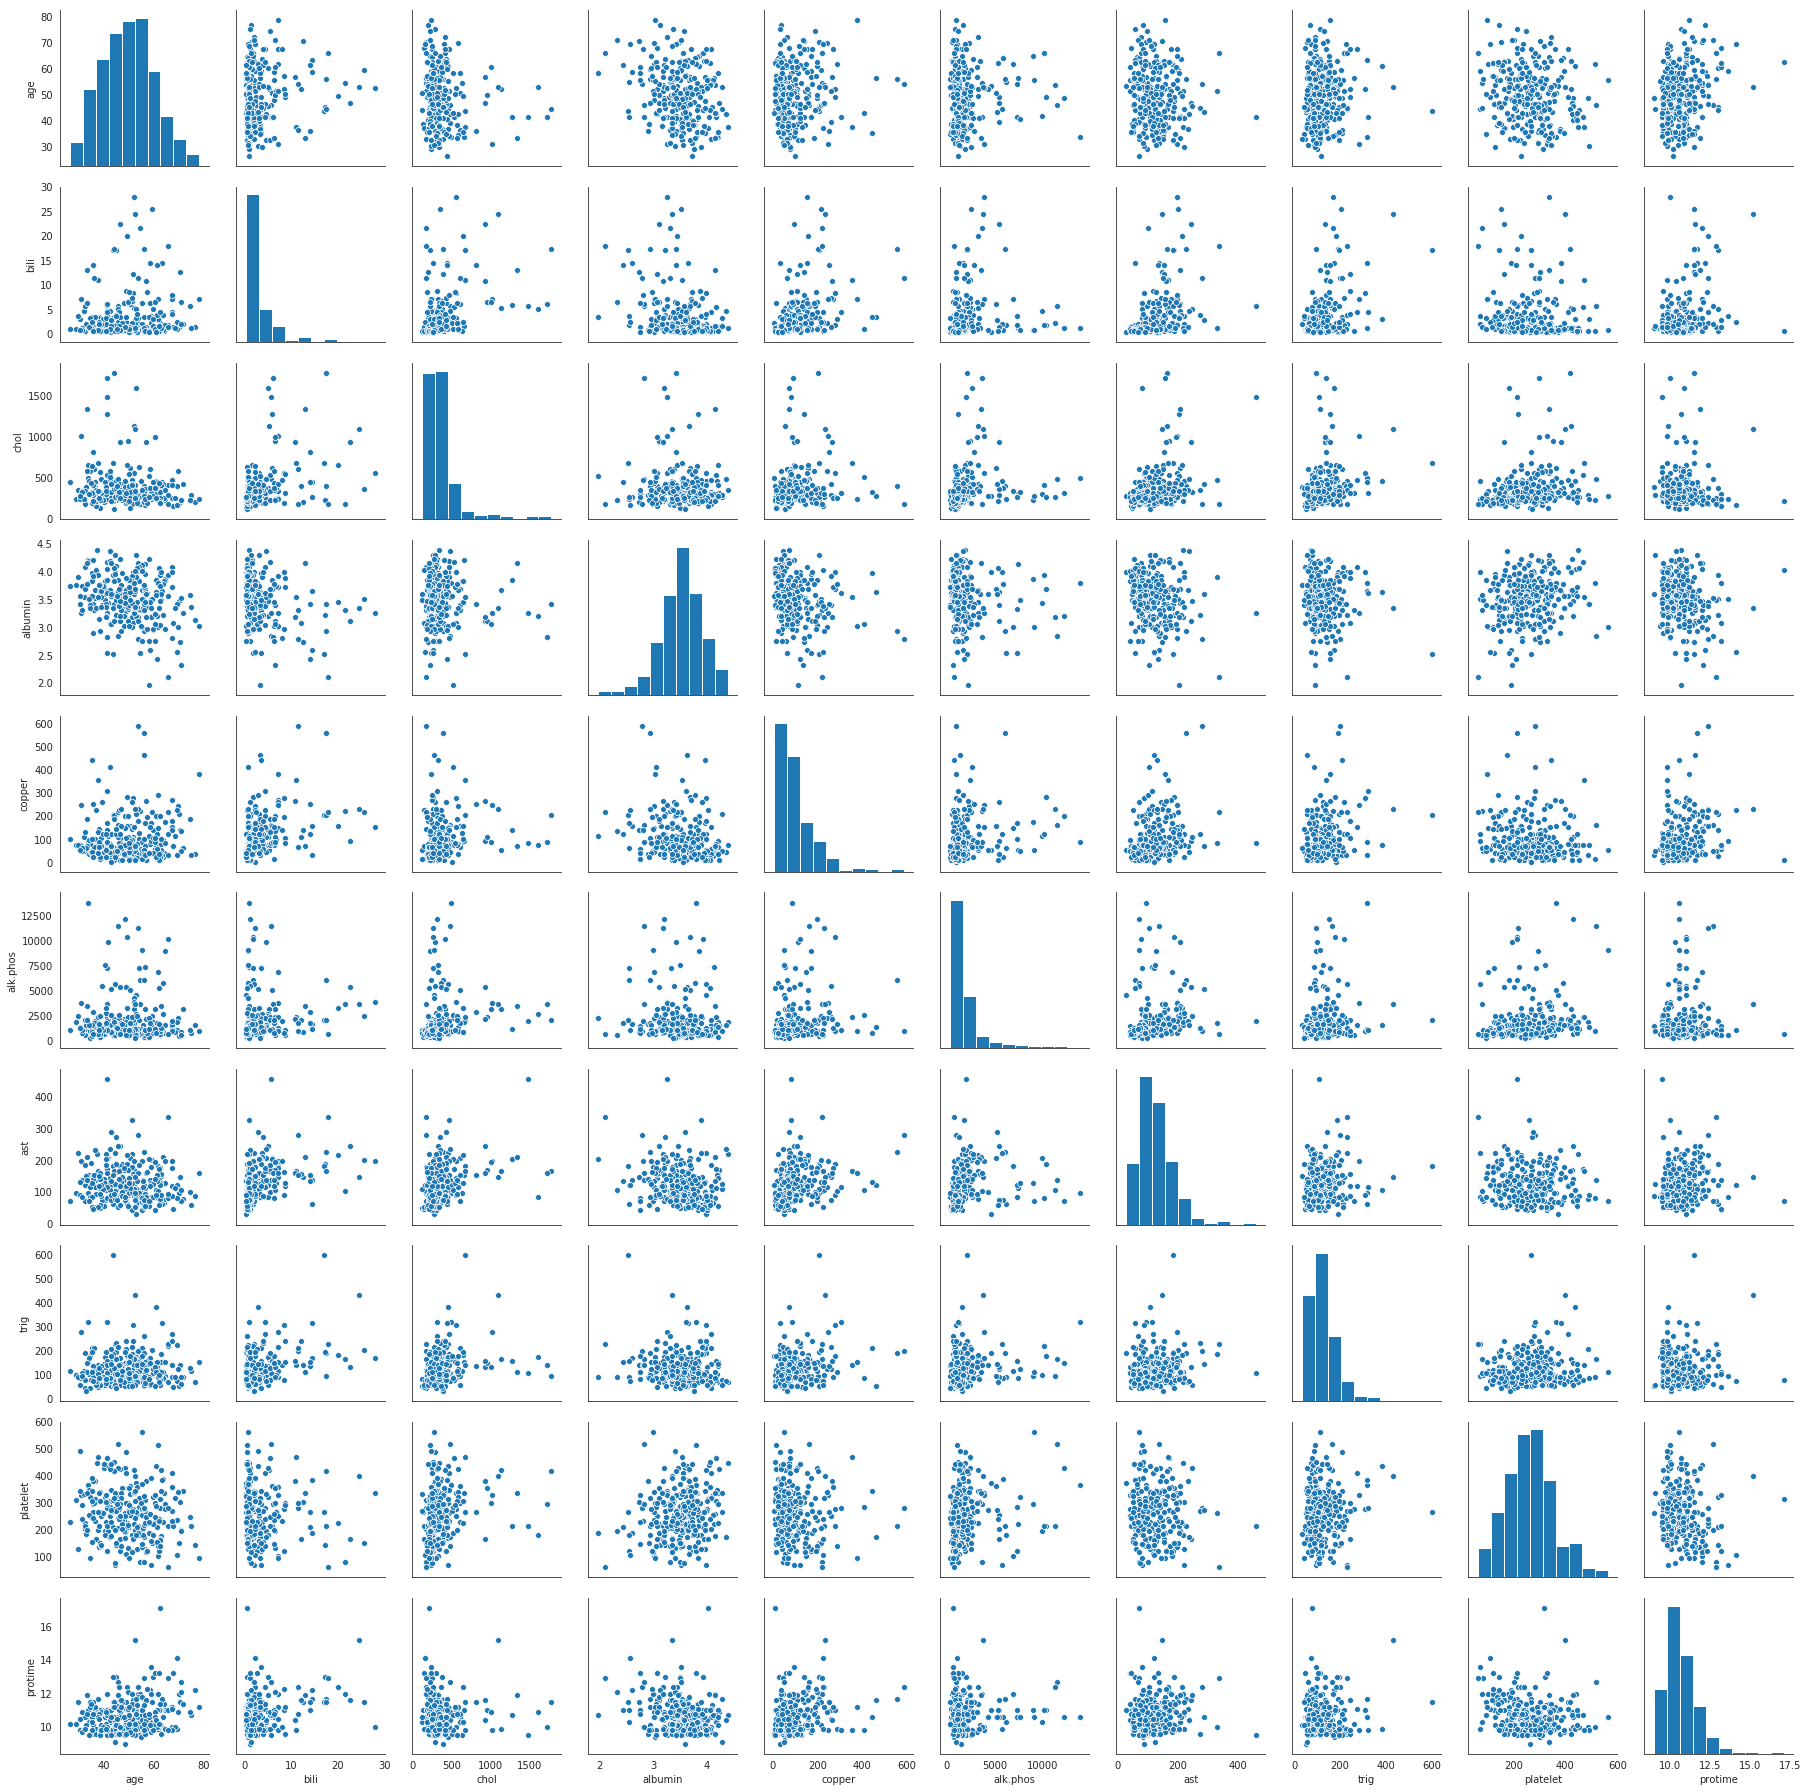

In [70]:
sns.pairplot(pbc_subset[["age", "bili", "chol", "albumin", "copper", "alk.phos", "ast", "trig", "platelet", "protime", "output"]])

/home/alabarga/NavarraBiomed/tesis/.tesis-env/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


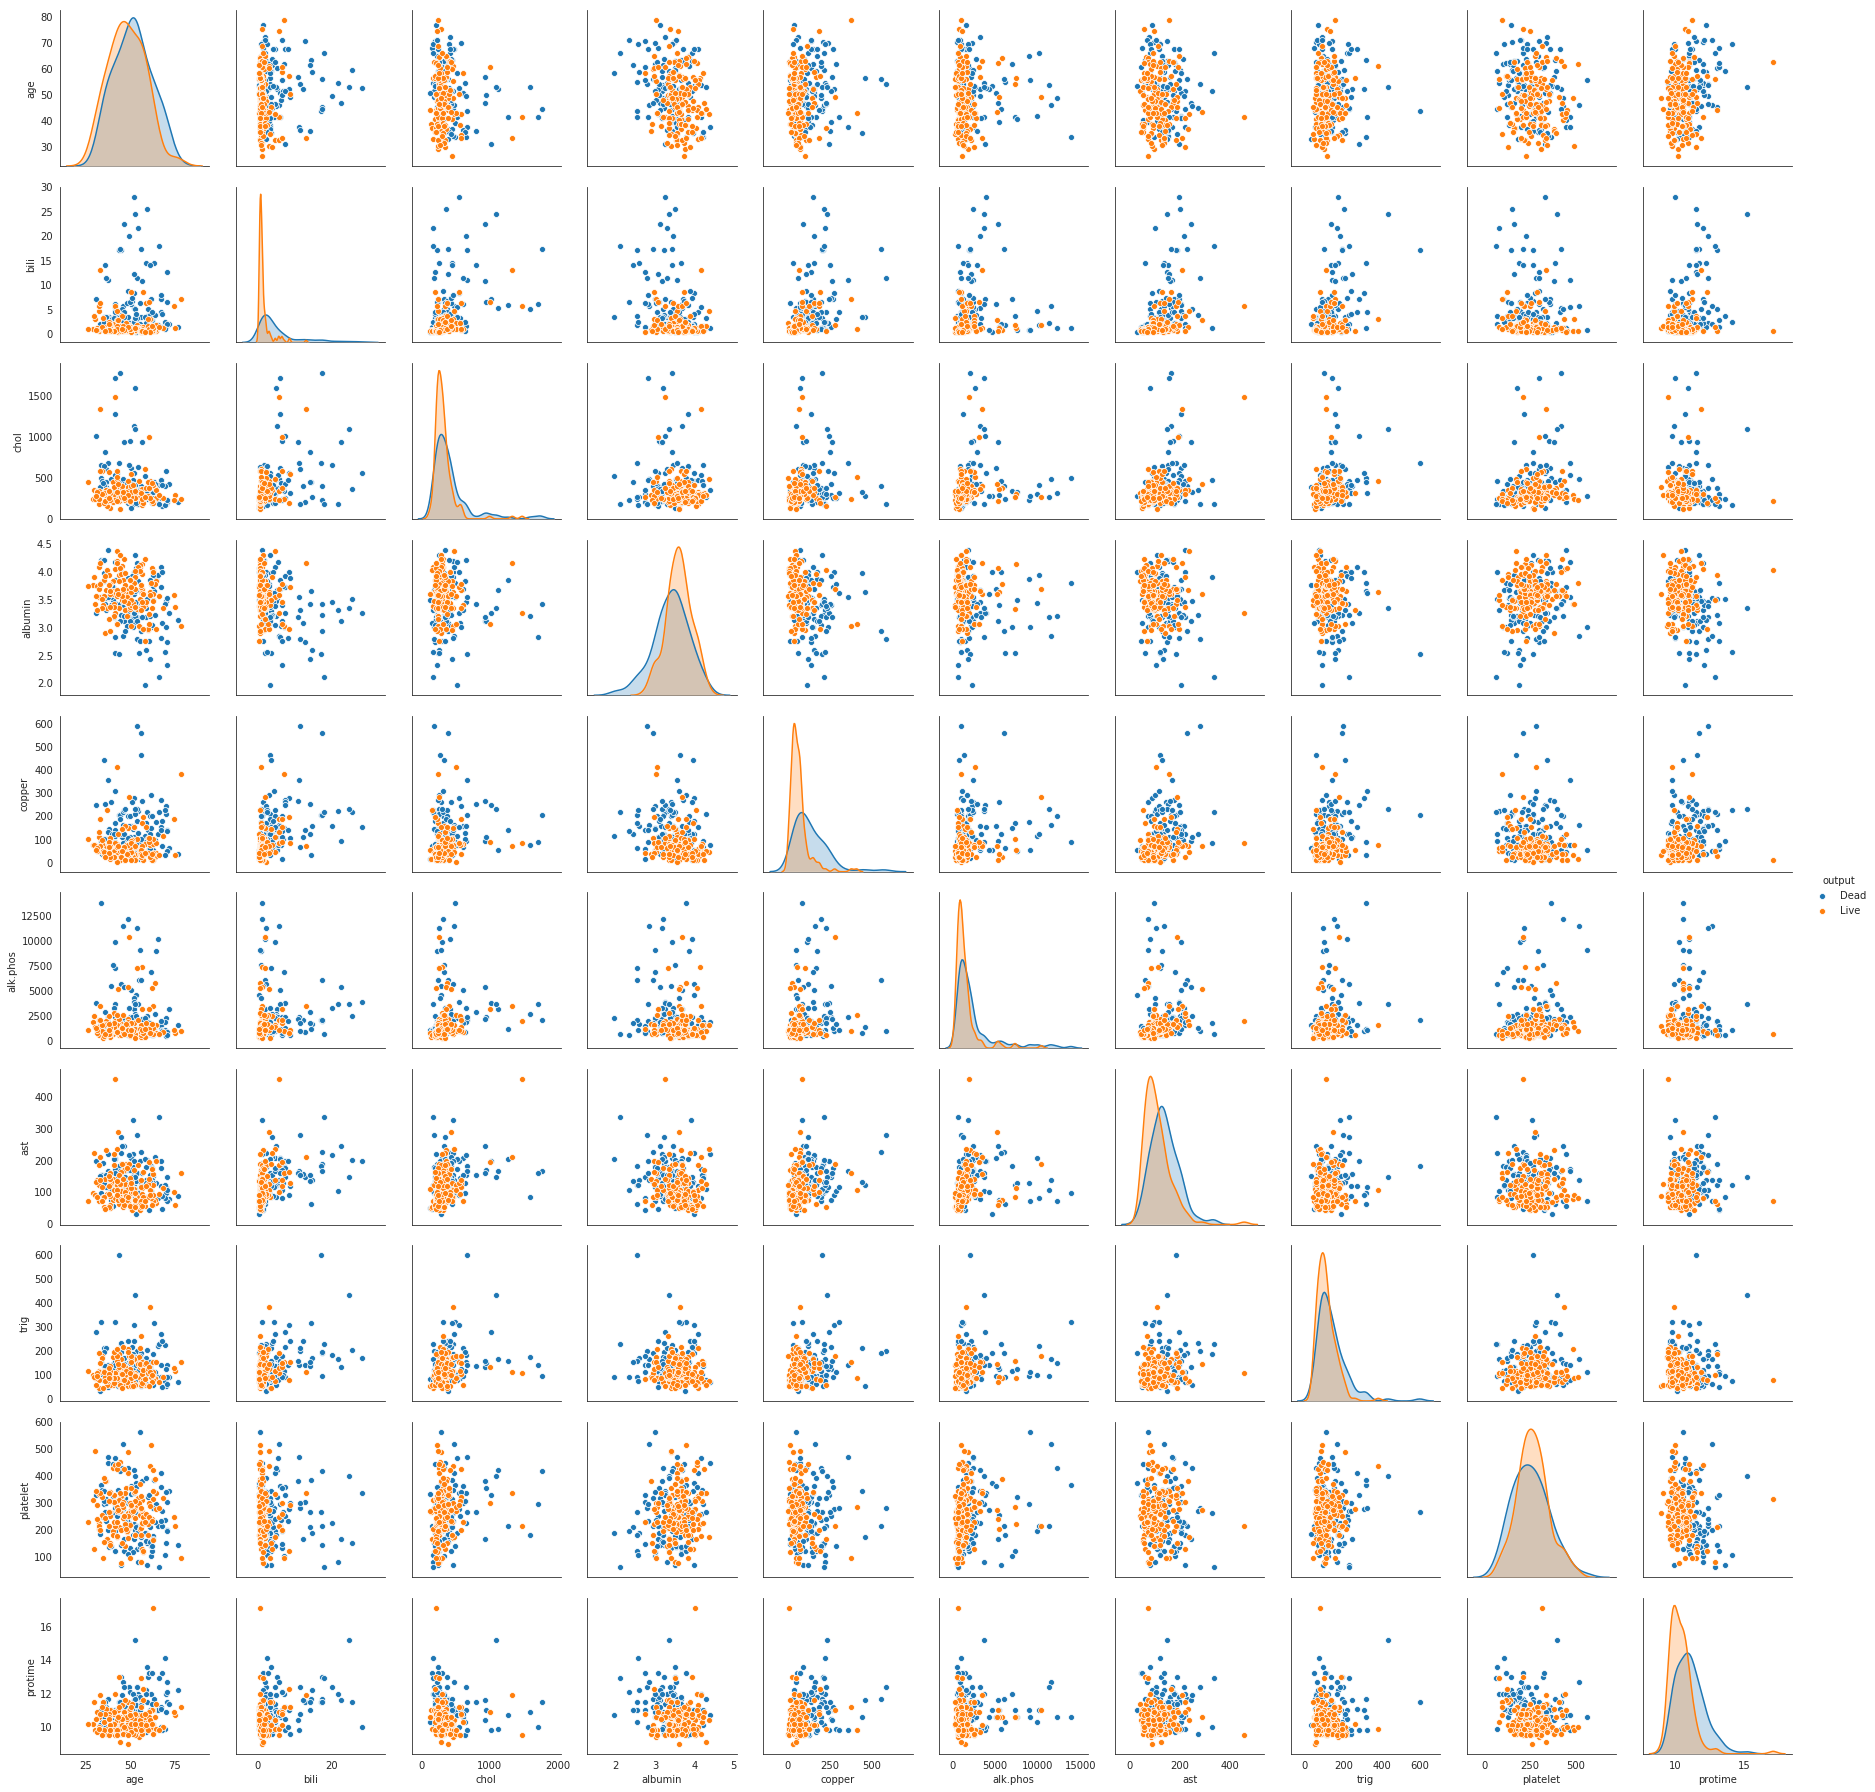

In [13]:
sns.pairplot(pbc_subset[["age", "bili", "chol", "albumin", "copper", "alk.phos", "ast", "trig", "platelet", "protime", "output"]], hue = 'output')

/home/alabarga/NavarraBiomed/tesis/.tesis-env/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


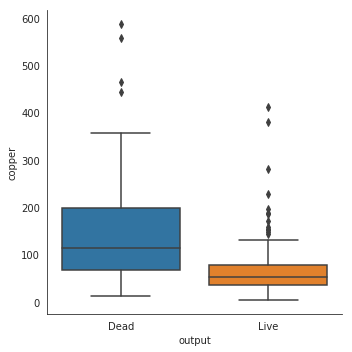

In [74]:
sns.factorplot("output", "copper", data=pbc_subset, kind="box");

/home/alabarga/NavarraBiomed/tesis/.tesis-env/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


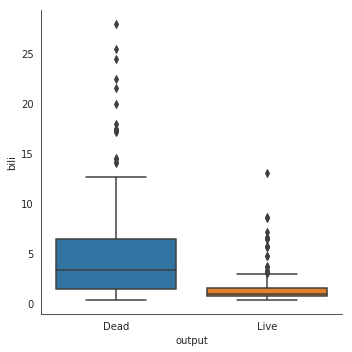

In [75]:
sns.factorplot("output", "bili", data=pbc_subset, kind="box");

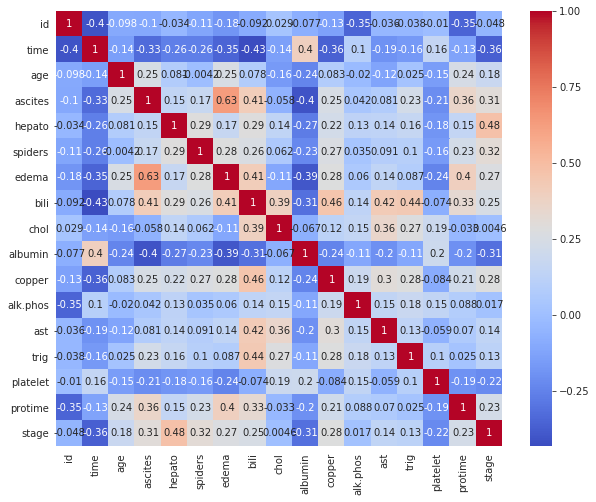

In [77]:
plt.figure(figsize = (10,8))
sb.heatmap(pbc_subset.corr(), annot = True, cmap = 'coolwarm')

In [51]:
pbc_subset.status

0      2
1      0
2      2
3      2
4      1
6      0
7      2
8      2
9      2
10     2
11     2
12     0
14     2
15     0
16     2
17     2
18     0
19     2
20     0
21     2
22     2
23     2
24     0
25     2
26     2
27     2
28     0
29     2
30     2
31     0
      ..
281    0
282    0
283    0
284    0
285    0
286    0
287    1
288    2
289    0
290    1
291    0
292    0
293    0
294    1
295    0
296    1
297    0
298    0
300    0
301    0
302    0
303    0
304    0
305    0
306    0
307    0
308    0
309    0
310    0
311    0
Name: status, Length: 276, dtype: category
Categories (3, int64): [0, 1, 2]

In [39]:
from sklearn.model_selection import train_test_split

X = pbc_subset[["ascites", "hepato", "spiders", "edema", "albumin",  "platelet", "stage"]]
y = pbc_subset.output


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 101)






In [40]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 276 to 12
Data columns (total 7 columns):
ascites     193 non-null float64
hepato      193 non-null float64
spiders     193 non-null float64
edema       193 non-null float64
albumin     193 non-null float64
platelet    193 non-null float64
stage       193 non-null float64
dtypes: float64(7)
memory usage: 12.1 KB


In [41]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(penalty='l2', C=0.001, random_state=0)
model.fit(X_train, y_train)
output = model.predict(X_test)


/home/alabarga/NavarraBiomed/tesis/.tesis-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [34]:
output = model.predict(X_test)

probas = model.predict_proba(X_test)

In [66]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print(confusion_matrix(y_test, output))
print(classification_report(y_test, output, digits=3))



[[10 25]
 [ 6 42]]
              precision    recall  f1-score   support

        Dead      0.625     0.286     0.392        35
        Live      0.627     0.875     0.730        48

    accuracy                          0.627        83
   macro avg      0.626     0.580     0.561        83
weighted avg      0.626     0.627     0.588        83



In [59]:
[1 if i=='Live' else 0 for i in output]

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1]

In [75]:
y_bin = [1 if i=='Live' else 0 for i in y]

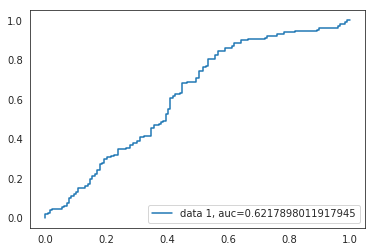

In [76]:
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_proba = model.predict_proba(X)[::,1]
fpr, tpr, _ = roc_curve(y_bin,  y_pred_proba)
auc = roc_auc_score(y_bin, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()


In [47]:
y_pred_proba

array([0.54458875, 0.51403828, 0.516604  , 0.52383209, 0.52168918,
       0.52317841, 0.56005135, 0.51658398, 0.47869108, 0.5207173 ,
       0.52276446, 0.54484821, 0.51462222, 0.51275997, 0.57595741,
       0.51721237, 0.53938596, 0.50944927, 0.55107894, 0.49560578,
       0.55087892, 0.54948285, 0.51088675, 0.49071393, 0.51770604,
       0.52154524, 0.49177967, 0.5442911 , 0.51285097, 0.52552693,
       0.4823388 , 0.50719528, 0.51187397, 0.5332556 , 0.57362505,
       0.57084162, 0.51214938, 0.52851426, 0.52969345, 0.50256006,
       0.50560788, 0.4950324 , 0.48682165, 0.49926807, 0.57310286,
       0.49513565, 0.52122457, 0.50127341, 0.518634  , 0.50920753,
       0.56089324, 0.51103718, 0.50965442, 0.54229832, 0.51431637,
       0.53708077, 0.48811414, 0.53395413, 0.57083671, 0.51175919,
       0.52469564, 0.54949928, 0.5510777 , 0.52880336, 0.49864053,
       0.52322838, 0.47981166, 0.51189643, 0.55205916, 0.53543173,
       0.5118327 , 0.50907994, 0.5199428 , 0.49234583, 0.51837

In [45]:
probas

array([[0.45541125, 0.54458875],
       [0.48596172, 0.51403828],
       [0.483396  , 0.516604  ],
       [0.47616791, 0.52383209],
       [0.47831082, 0.52168918],
       [0.47682159, 0.52317841],
       [0.43994865, 0.56005135],
       [0.48341602, 0.51658398],
       [0.52130892, 0.47869108],
       [0.4792827 , 0.5207173 ],
       [0.47723554, 0.52276446],
       [0.45515179, 0.54484821],
       [0.48537778, 0.51462222],
       [0.48724003, 0.51275997],
       [0.42404259, 0.57595741],
       [0.48278763, 0.51721237],
       [0.46061404, 0.53938596],
       [0.49055073, 0.50944927],
       [0.44892106, 0.55107894],
       [0.50439422, 0.49560578],
       [0.44912108, 0.55087892],
       [0.45051715, 0.54948285],
       [0.48911325, 0.51088675],
       [0.50928607, 0.49071393],
       [0.48229396, 0.51770604],
       [0.47845476, 0.52154524],
       [0.50822033, 0.49177967],
       [0.4557089 , 0.5442911 ],
       [0.48714903, 0.51285097],
       [0.47447307, 0.52552693],
       [0.

/home/alabarga/NavarraBiomed/tesis/.tesis-env/lib/python3.6/site-packages/sklearn/utils/deprecation.py:76: DeprecationWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=DeprecationWarning)


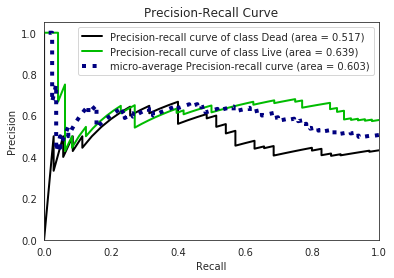

In [35]:
import scikitplot as skplt
import matplotlib.pyplot as plt

skplt.metrics.plot_precision_recall_curve(y_test, probas)
skplt.metrics.plot_roc(list(y), list(output))
plt.show()

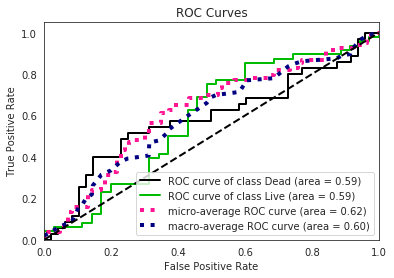

In [36]:
skplt.metrics.plot_roc(y_test, probas)
plt.show()

In [52]:
from sklearn.preprocessing import label_binarize

In [55]:
np.array(label_binarize(output, classes=['Live','Dead']))

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0]])

In [ ]:
catColumns = df.select_dtypes(['object']).columns

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

for col in catColumns:
    n = len(df[col].unique())
    if (n > 2):
       X = pd.get_dummies(df[col])
       X = X.drop(X.columns[0], axis=1)
       df[X.columns] = X
       df.drop(col, axis=1, inplace=True)  # drop the original categorical variable (optional)
    else:
       le.fit(df[col])
       df[col] = le.transform(df[col])

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

cols = ["Age","Fare","TravelAlone","Pclass_1","Pclass_2","Embarked_C","Embarked_S","Sex_male","IsMinor"] 
X = final_train[cols]
y = final_train['Survived']
# Build a logreg and compute the feature importances
model = LogisticRegression()
# create the RFE model and select 8 attributes
rfe = RFE(model, 8)
rfe = rfe.fit(X, y)
# summarize the selection of the attributes
print('Selected features: %s' % list(X.columns[rfe.support_]))